In [1]:
import pandas as pd, numpy as np
import sys, os
from pprint import pprint
import random
from datetime import datetime, timedelta

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
def print_runtime():
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    print("-"*19)
print_runtime()

2021-10-18 18:57:39
-------------------


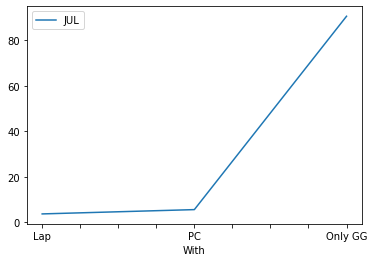

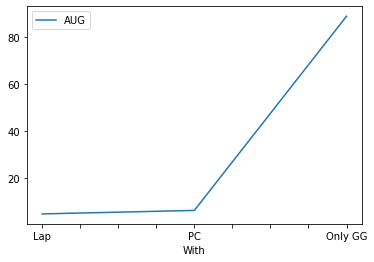

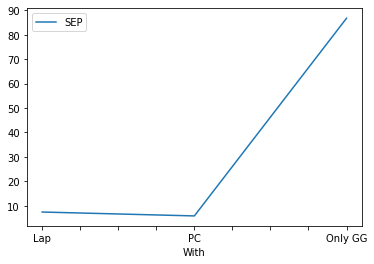

In [4]:
source_path = ["./Order-07.xlsx", "./Order-08.xlsx", "./Order-09.xlsx"]
for i in range(0, len(source_path)):
    pdf_raw = pd.read_excel(source_path[i])
    pdf_gearvn = pdf_raw[['ID tích hợp', 'Mã sản phẩm', 'Số lượng', 'Giá trị đơn hàng', "Trạng thái"]]
    #Find total order
    pdf_gearvn = pdf_gearvn[(pdf_gearvn["Trạng thái"] == 'Thành công')
                       | (pdf_gearvn["Trạng thái"] == 'Đã xác nhận')
                       | (pdf_gearvn["Trạng thái"] == 'Đang xác nhận')]
    pdf_gearvn['Ngành'] = pdf_gearvn['Mã sản phẩm'].str.split(pat = '-',expand=False).str[0]
    #Find Gaming Gear Order ID
    pdf_gaming_gear = pdf_gearvn[(pdf_gearvn['Ngành'] == 'CHU')
                              | (pdf_gearvn['Ngành'] == 'KB')
                              | (pdf_gearvn['Ngành'] == 'TAI') ]
    pdf_gg_id = pd.DataFrame(pdf_gaming_gear['ID tích hợp'].unique(), columns = ['GG Order ID'])
    #Find Laptop Order ID
    pdf_lap = pdf_gearvn[pdf_gearvn['Ngành'] == 'LAP']
    pdf_lap_id = pd.DataFrame(pdf_lap['ID tích hợp'].unique(), columns = ['Lap Order ID'])
    #Find PC Order ID
    pdf_cpu = pdf_gearvn[pdf_gearvn['Ngành'] =='CPU']
    pdf_mb = pdf_gearvn[pdf_gearvn['Ngành'] == 'MB']
    pdf_psu = pdf_gearvn[pdf_gearvn['Ngành'] == 'PW']
    pdf_pc = (pdf_cpu.merge(pdf_mb, on = 'ID tích hợp', how = 'inner', suffixes=('_cpu','_mb'))
              .merge(pdf_psu,on = 'ID tích hợp', how = 'inner'))
    pdf_pc_id = pd.DataFrame(pdf_pc['ID tích hợp'].unique(), columns = ['PC Order ID'])
    #Find Order ID With Gaming Gear
    pdf_gg_id['with']=None
    pdf_gg_id['with'].mask(pdf_gg_id['GG Order ID'].isin(pdf_lap_id['Lap Order ID']), 
                        other = 'lap', 
                        inplace = True)
    pdf_gg_id['with'].mask(pdf_gg_id['GG Order ID'].isin(pdf_pc_id['PC Order ID']), 
                        other = 'pc', 
                        inplace = True)
    pdf_gg_id['with'].mask((pdf_gg_id['GG Order ID'].isin(pdf_lap_id['Lap Order ID']) == False) 
                        & (pdf_gg_id['GG Order ID'].isin(pdf_pc_id['PC Order ID']) == False), 
                        other = 'only_gg', 
                        inplace = True)
    #Find ratio
    lap_with_gg_ratio = (pdf_gg_id[pdf_gg_id['with'] == 'lap'])['with'].count() / pdf_gg_id['with'].count() *100
    pc_with_gg_ratio = (pdf_gg_id[pdf_gg_id['with'] == 'pc'])['with'].count() / pdf_gg_id['with'].count() *100
    only_gg_ratio = (pdf_gg_id[pdf_gg_id['with'] == 'only_gg'])['with'].count() / pdf_gg_id['with'].count() *100
    #Graph
    months = ['JUL', 'AUG', 'SEP']
    pdf_gg_ratio = pd.DataFrame({'With': ['Lap','PC','Only GG'], months[i]:[lap_with_gg_ratio, pc_with_gg_ratio, only_gg_ratio]})
    pdf_gg_ratio.plot(x = 'With', y = months[i], kind = 'line')
    i+=1

